In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("D:\\project\\kidney_disease.csv")

In [3]:
df.tail(5)

id   age    bp     sg   al   su     rbc      pc         pcc          ba  \
395  395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

     ...  pcv    wc   rc  htn  dm  cad appet  pe ane classification  
395  ...   47  6700  4.9   no  no   no  good  no  no         notckd  
396  ...   54  7800  6.2   no  no   no  good  no  no         notckd  
397  ...   49  6600  5.4   no  no   no  good  no  no         notckd  
398  ...   51  7200  5.9   no  no   no  good  no  no         notckd  
399  ...   53  6800  6.1   no  no   no  good  no  no         notckd  

[5 rows x 26 columns]

In [4]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
df.shape

(400, 26)

In [6]:
columns=pd.read_csv("D:\\project\\kidney_data_description.txt",sep='-')

In [7]:
columns=columns.reset_index()

In [8]:
columns

index             1. Features:
0               id                        id
1              age                       age
2               bp            blood pressure
3               sg          specific gravity
4               al                   albumin
5               su                     sugar
6              rbc           red blood cells
7               pc                  pus cell
8              pcc           pus cell clumps
9               ba                  bacteria
10             bgr      blood glucose random
11              bu                blood urea
12              sc          serum creatinine
13             sod                    sodium
14             pot                 potassium
15            hemo               haemoglobin
16             pcv        packed cell volume
17              wc    white blood cell count
18              rc      red blood cell count
19             htn               ypertension
20              dm         diabetes mellitus
21             cad   coronary artery disease
22           appet                  appetite
23              pe               pedal edema
24             ane                    anemia
25  classification                     class

In [9]:
columns.columns=['cols','col_names']

In [10]:
df.columns=columns['col_names'].values

In [11]:
df.head()

id   age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0   0  48.0            80.0             1.020      1.0    0.0             NaN   
1   1   7.0            50.0             1.020      4.0    0.0             NaN   
2   2  62.0            80.0             1.010      2.0    3.0          normal   
3   3  48.0            70.0             1.005      4.0    0.0          normal   
4   4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  ...  packed cell volume  \
0    normal      notpresent  notpresent  ...                  44   
1    normal      notpresent  notpresent  ...                  38   
2    normal      notpresent  notpresent  ...                  31   
3  abnormal         present  notpresent  ...                  32   
4    normal      notpresent  notpresent  ...                  35   

   white blood cell count  red blood cell count  ypertension  \
0                    7800                   5.2          yes   
1                    6000                   NaN           no   
2                    7500                   NaN           no   
3                    6700                   3.9          yes   
4                    7300                   4.6           no   

   diabetes mellitus  coronary artery disease appetite pedal edema anemia  \
0                yes                       no     good          no     no   
1                 no                       no     good          no     no   
2                yes                       no     poor          no    yes   
3                 no                       no     poor         yes    yes   
4                 no                       no     good          no     no   

  class  
0   ckd  
1   ckd  
2   ckd  
3   ckd  
4   ckd  

[5 rows x 26 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7    pus cell                335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [13]:
features=['packed cell volume','white blood cell count' ,'red blood cell count']


In [14]:
def convert_dtype(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')
    

In [15]:
for feature in features:
    convert_dtype(df,feature)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7    pus cell                335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [17]:
df.drop('id',axis=1,inplace=True)

# Extract Numerical & Categorical Features

In [18]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtypes == 'object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [19]:
cat_col,num_col=extract_cat_num(df)


In [20]:
df[cat_col].head(5)

red blood cells  pus cell pus cell clumps    bacteria ypertension  \
0             NaN    normal      notpresent  notpresent         yes   
1             NaN    normal      notpresent  notpresent          no   
2          normal    normal      notpresent  notpresent          no   
3          normal  abnormal         present  notpresent         yes   
4          normal    normal      notpresent  notpresent          no   

  diabetes mellitus coronary artery disease appetite pedal edema anemia class  
0               yes                      no     good          no     no   ckd  
1                no                      no     good          no     no   ckd  
2               yes                      no     poor          no    yes   ckd  
3                no                      no     poor         yes    yes   ckd  
4                no                      no     good          no     no   ckd

In [21]:
df[num_col].shape

(400, 14)

In [22]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

# for getting a dirtyness in data we use this thinks

In [23]:
for col in cat_col:
    print("{} has {} values".format(col,df[col].unique()))
    print("\n")

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [24]:
df['diabetes mellitus'].replace(to_replace={"\tno":"no","\tyes":"yes"},inplace=True)
df['coronary artery disease'].replace(to_replace={"\tno":"no"},inplace=True)
df['class'].replace(to_replace={"ckd\t":"ckd"},inplace=True)

In [25]:
for col in cat_col:
    print("{} has {} values".format(col,df[col].unique()))
    print("\n")

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




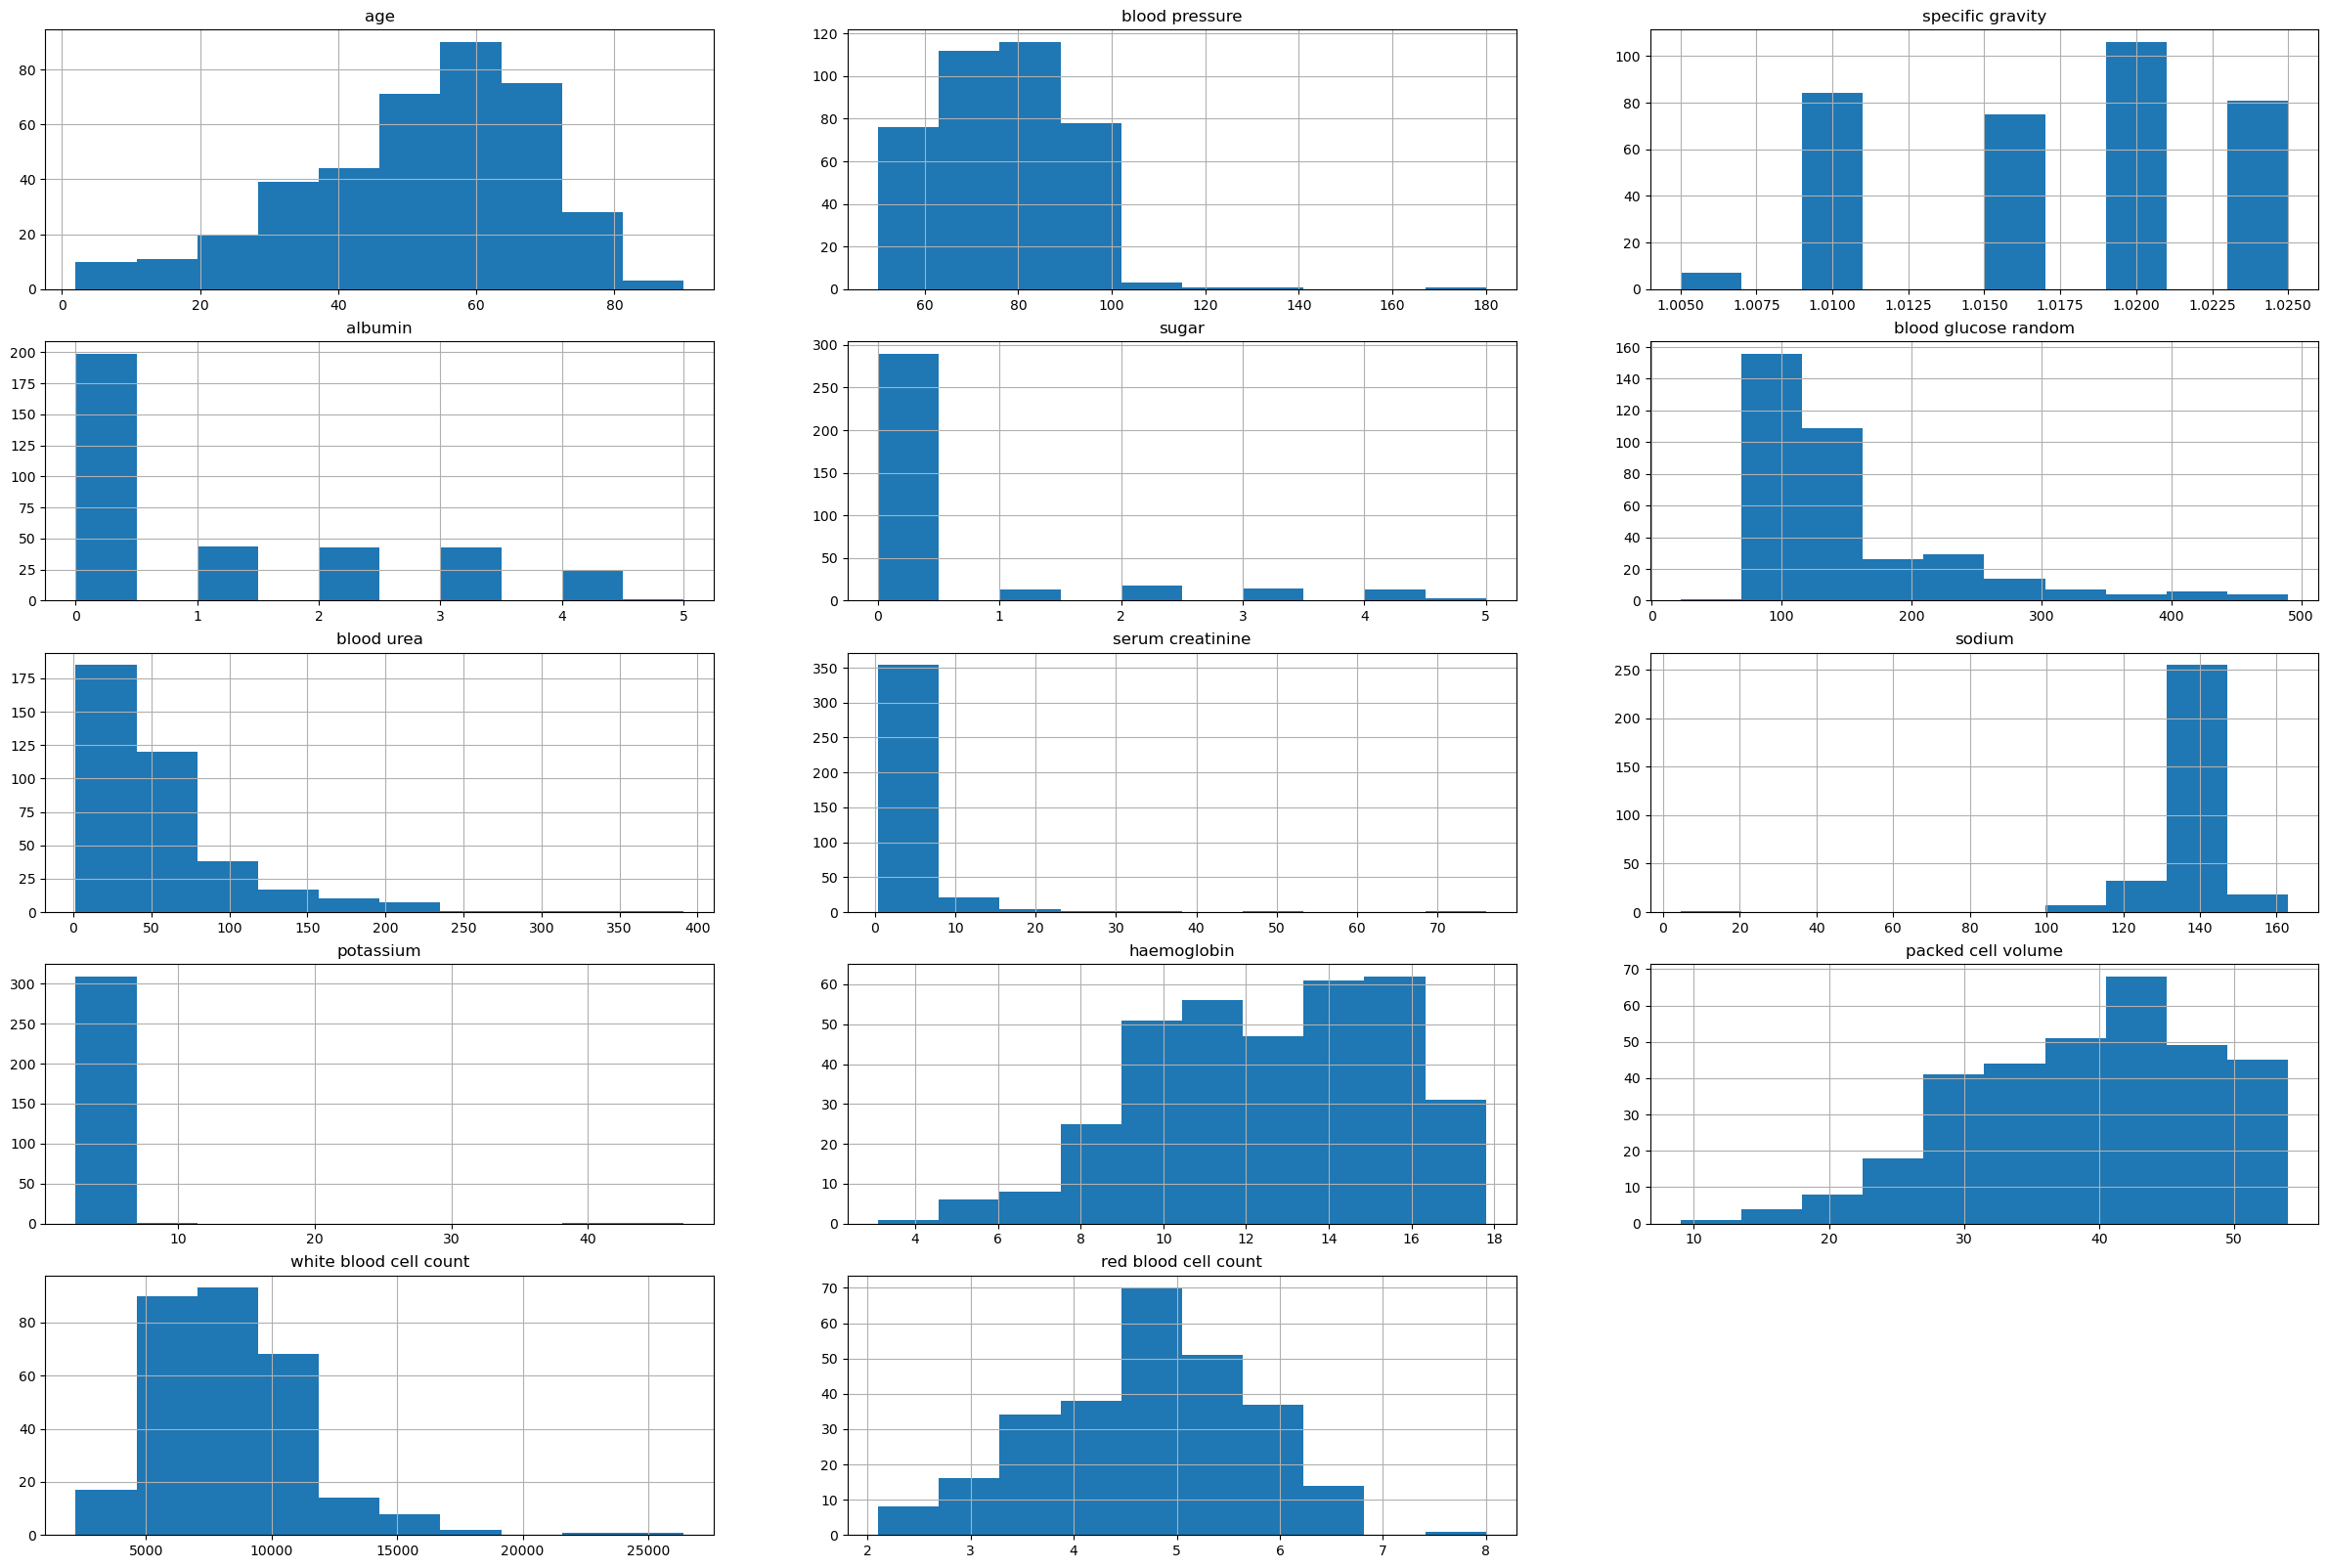

In [26]:
plt.figure(figsize=(30,20))
for i,features in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[features].hist()
    plt.title(features)

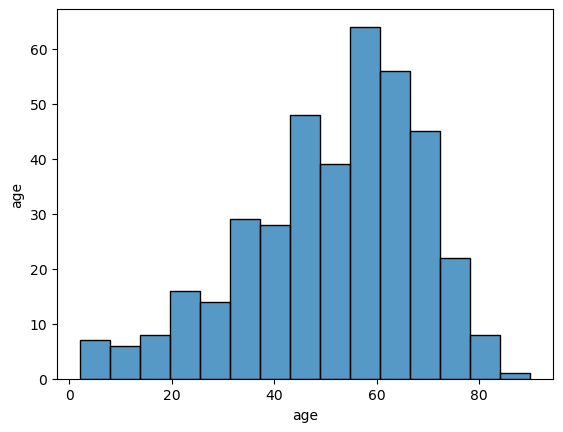

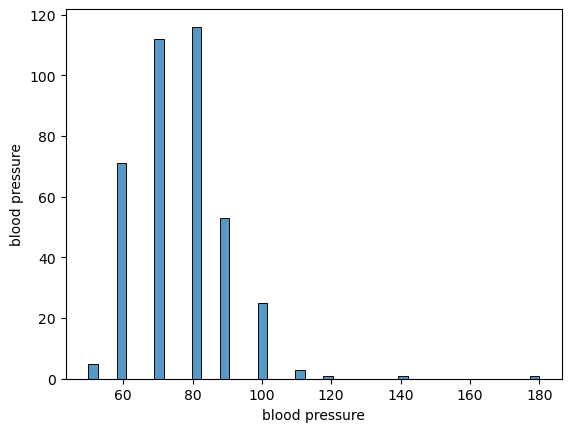

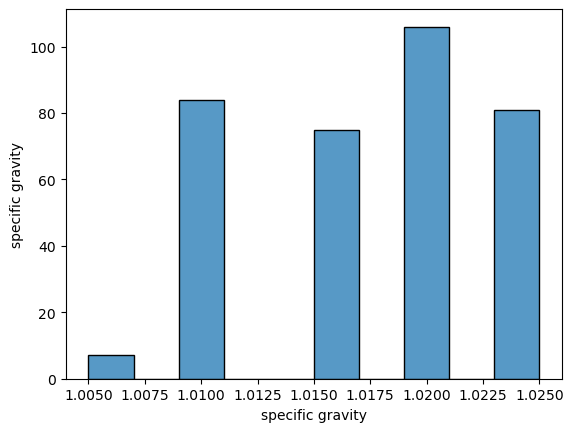

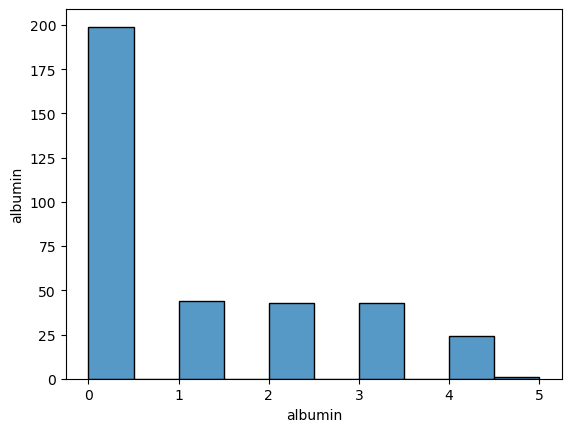

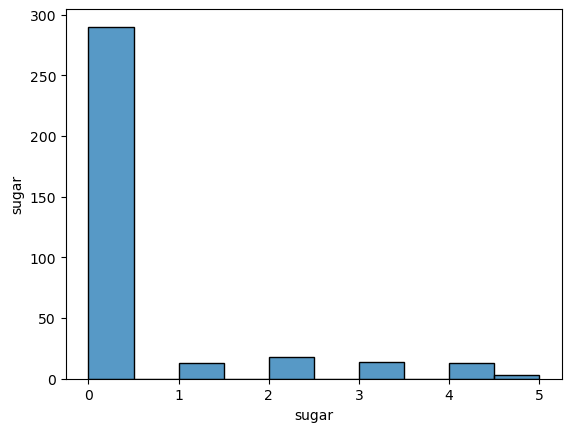

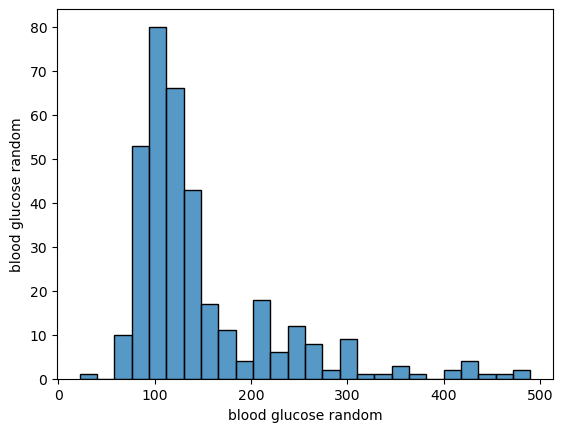

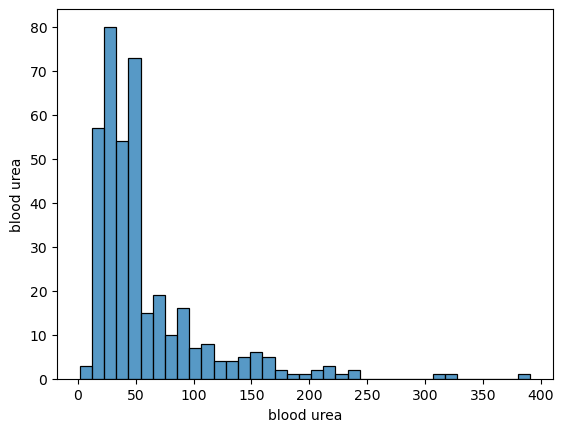

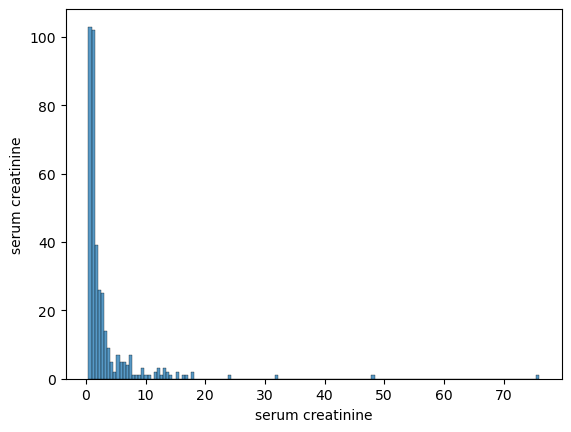

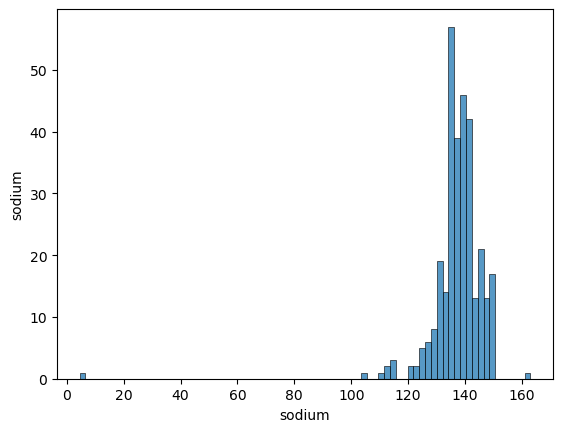

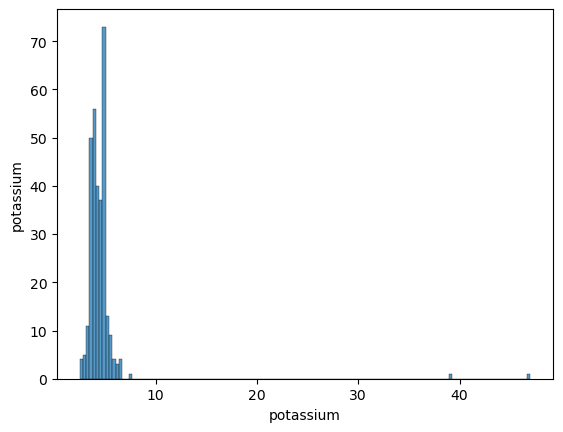

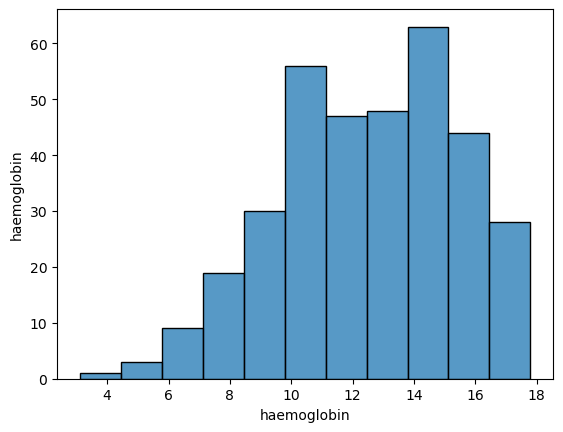

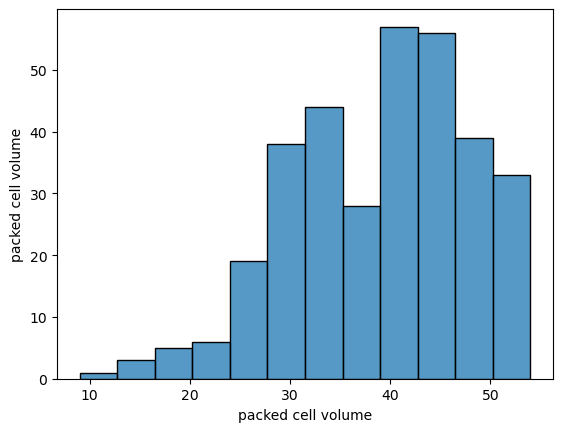

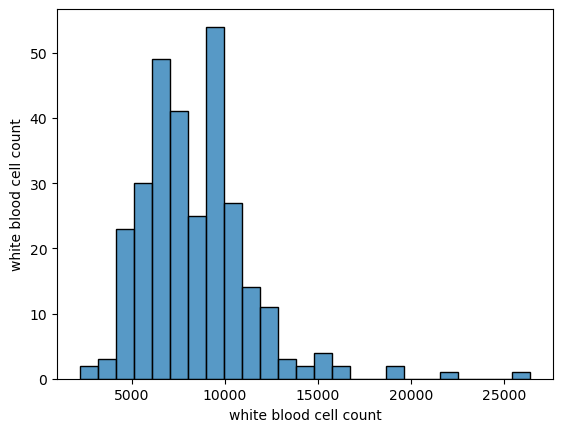

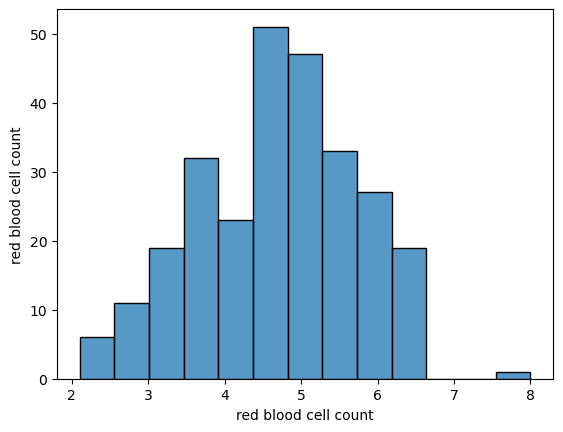

In [27]:
for features in num_col:
    
    sns.histplot(df[features])
    plt.ylabel(features)
    plt.plot()
    plt.show()

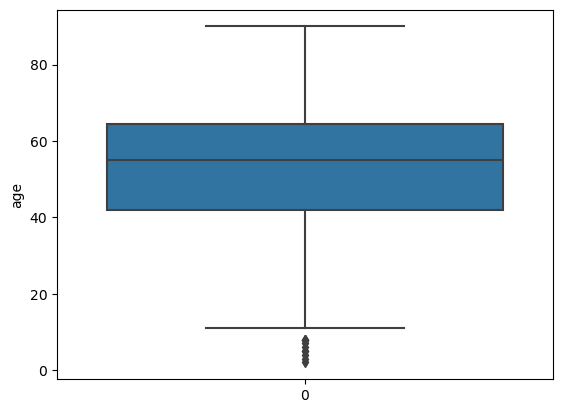

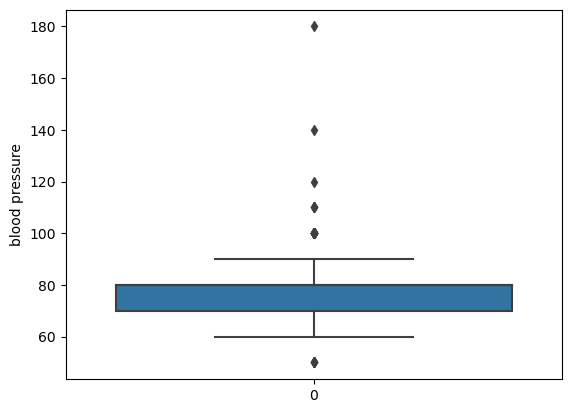

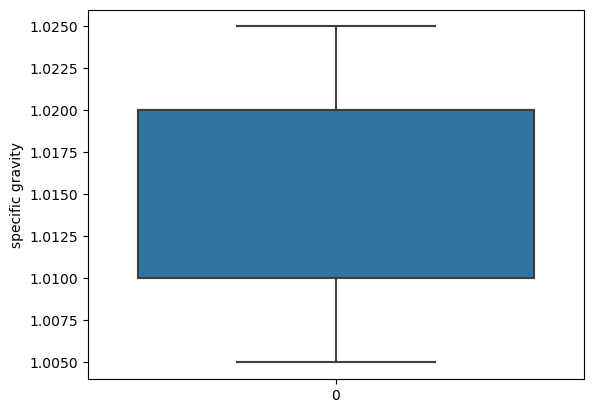

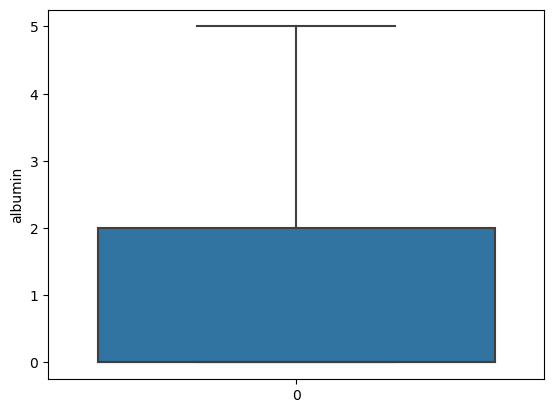

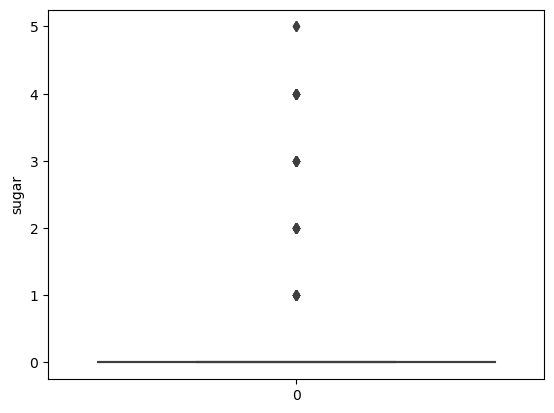

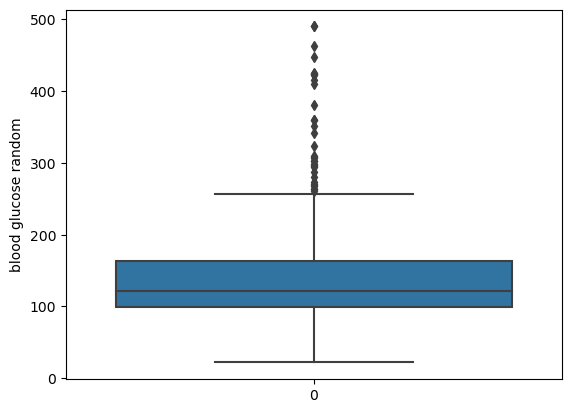

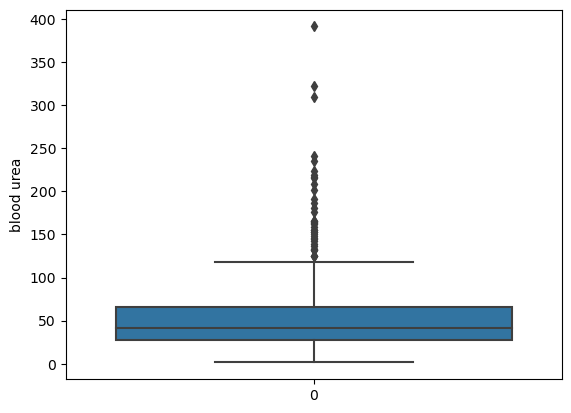

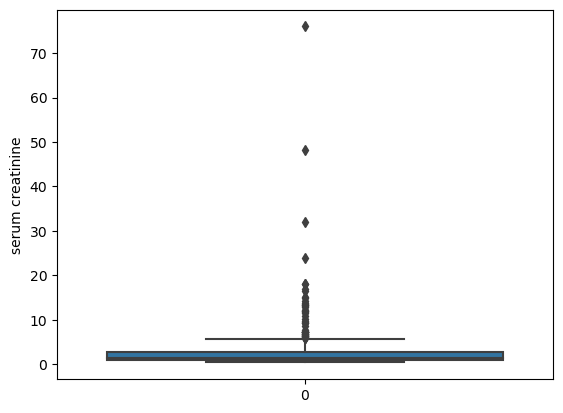

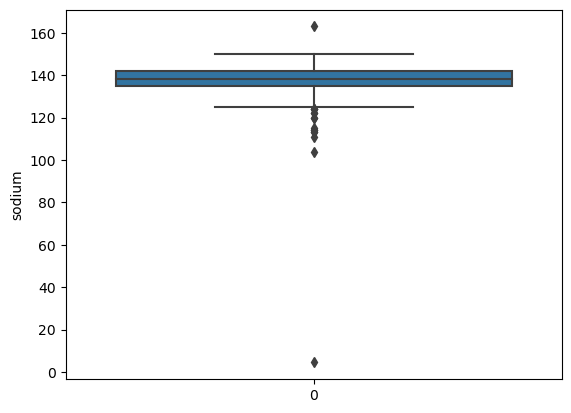

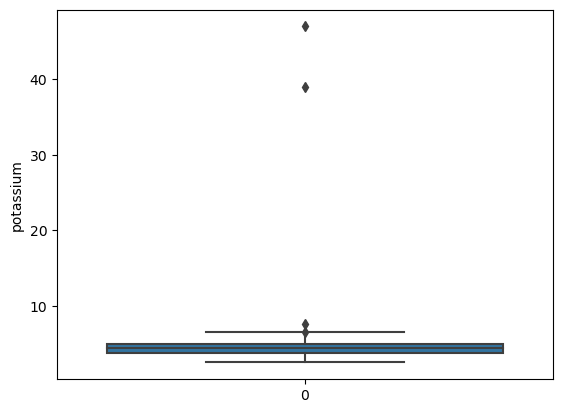

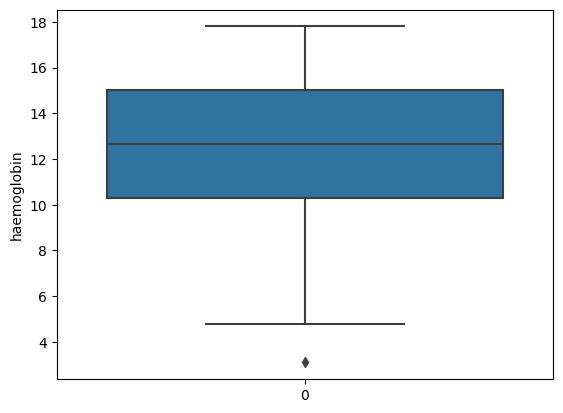

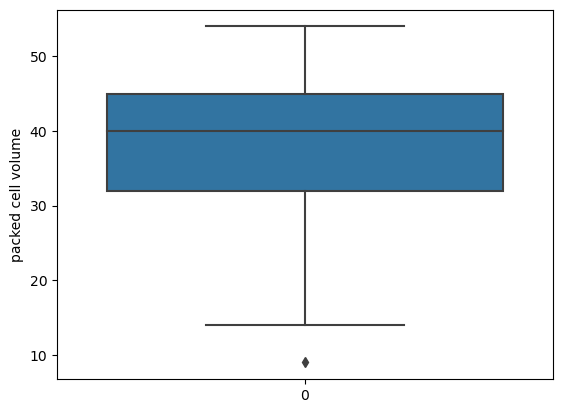

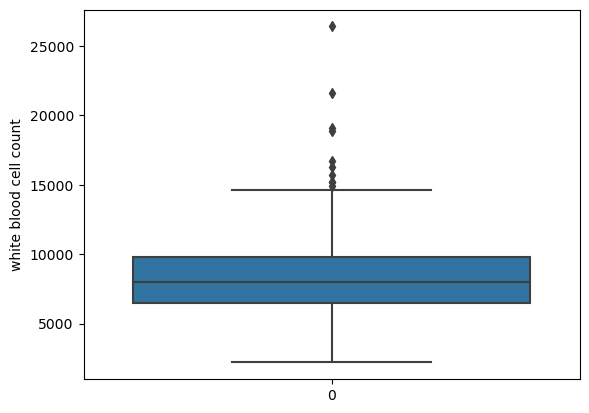

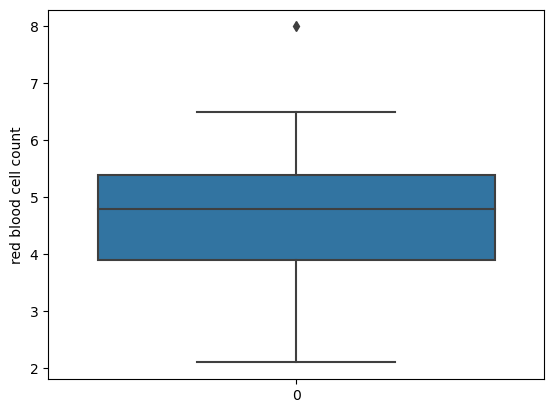

In [28]:
for features in num_col:
    
    sns.boxplot(df[features])
    plt.ylabel(features)
    plt.plot()
    plt.show()

In [29]:
len(cat_col)

11

In [30]:
#plt.figure(figsize=(20,20))
#for i,feature in enumerate(cat_col):
    #plt.subplot(4,3,i+1)
    #sns.countplot(df[feature])

Text(0.5, 1.0, 'target Class')

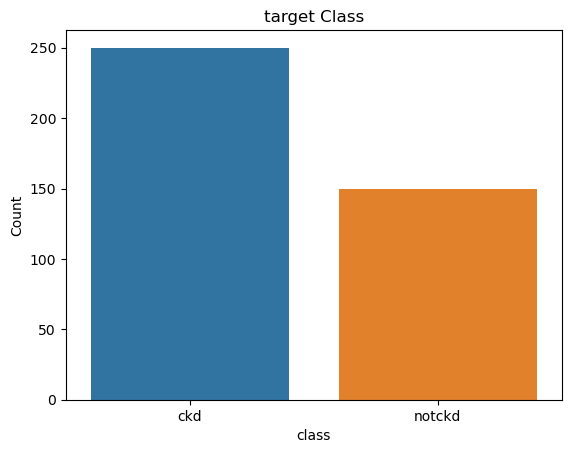

In [31]:
sns.countplot(data=df,x='class')
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")

C:\Users\Acer\AppData\Local\Temp\ipykernel_10520\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

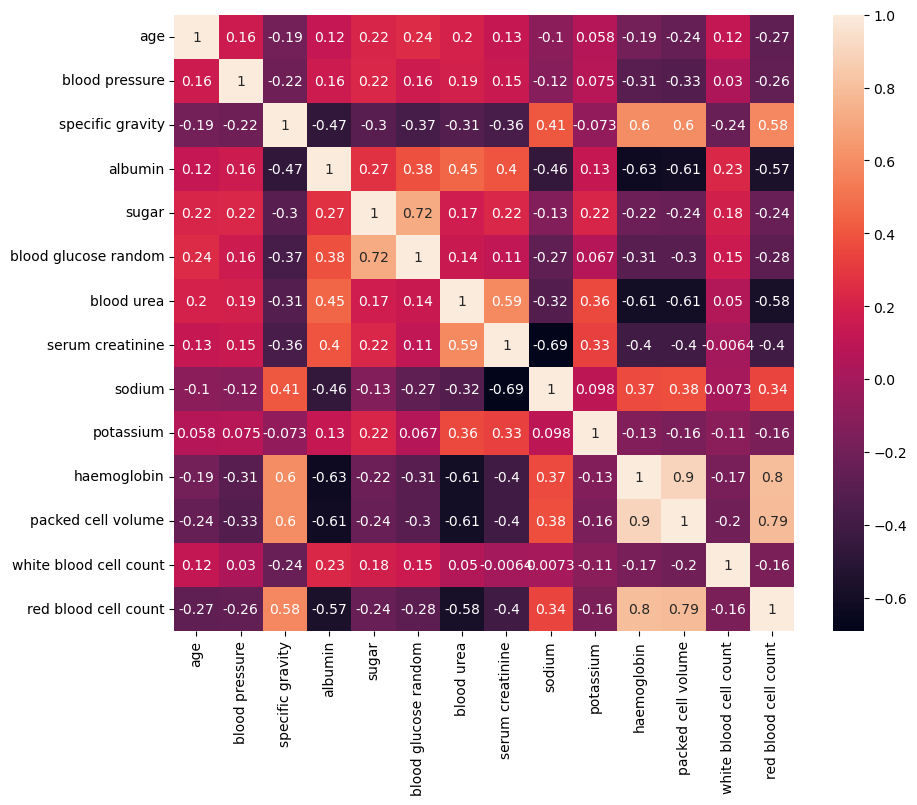

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [33]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [34]:
import plotly.express as px

In [35]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [36]:
px.violin(df,y='red blood cell count',x='class',color='class')

In [37]:
px.scatter(df,x='haemoglobin',y='packed cell volume')

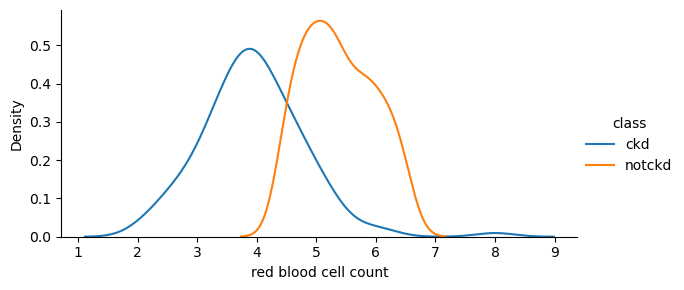

In [38]:
grid=sns.FacetGrid(df,hue='class',aspect=2)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

In [39]:
def violin(col):
    fig=px.violin(df,y=col,x='class',color='class',box=True)
    return fig.show()

In [40]:
def scatters(col1,col2):
    fig = px.scatter(df, x = col1,y = col2,color='class')
    return fig.show()
    

In [41]:
def kede_plot(feature):
    grid=sns.FacetGrid(df,hue='class',aspect=2)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()

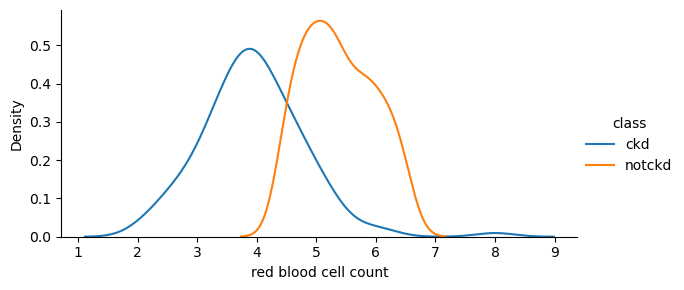

In [42]:
kede_plot('red blood cell count')

In [43]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

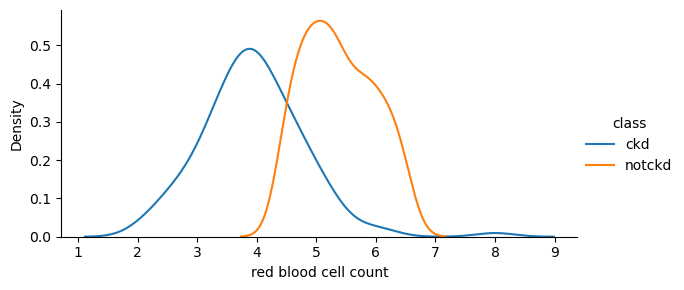

In [44]:
kede_plot('red blood cell count')

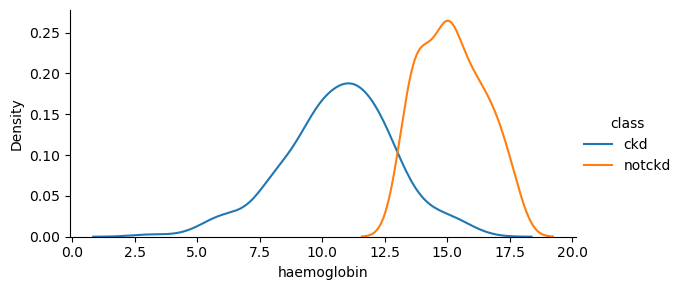

In [45]:
kede_plot('haemoglobin')

In [46]:
#scatters('red_blood_cell_count', 'packed_cell_volume')

In [47]:
violin('red blood cell count')

In [48]:
#sns.countplot(df['red blood cells'])

In [49]:
data=df.copy()

In [50]:
data.head(5)

age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   ypertension  diabetes mellitus  coronary artery disease  appetite  \
0          yes                yes                       no      good   
1           no                 no                       no      good   
2           no                yes                       no      poor   
3          yes                 no                       no      poor   
4           no                 no                       no      good   

   pedal edema anemia class  
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

In [51]:
data['red blood cells'].dropna().sample()

246    abnormal
Name: red blood cells, dtype: object

In [52]:
data['red blood cells'].isnull().sum()

152

In [53]:
random_sample=data['red blood cells'].dropna().sample(152)

In [54]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [55]:
random_sample.index

Int64Index([379,   2,  49, 173, 288, 354, 282, 386, 190, 279,
            ...
            154, 372,   3, 153,  87, 353,  84, 319, 378, 326],
           dtype='int64', length=152)

In [56]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [57]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [58]:
random_sample

0        normal
1        normal
5        normal
6      abnormal
10       normal
         ...   
309      normal
322      normal
349      normal
350      normal
381      normal
Name: red blood cells, Length: 152, dtype: object

In [59]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [60]:
data.head()

age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0  48.0            80.0             1.020      1.0    0.0          normal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   ypertension  diabetes mellitus  coronary artery disease  appetite  \
0          yes                yes                       no      good   
1           no                 no                       no      good   
2           no                yes                       no      poor   
3          yes                 no                       no      poor   
4           no                 no                       no      good   

   pedal edema anemia class  
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

In [61]:
data['red blood cells'].isnull().sum()

0

In [62]:
#sns.countplot(data['red blood cells'])

In [63]:
def ramdom_values_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [64]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [65]:
for col in num_col:
    ramdom_values_imputation(col)

In [66]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [67]:
data[cat_col].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [68]:
ramdom_values_imputation(' pus cell') 

In [69]:
def inpute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [70]:
for col in cat_col:
    inpute_mode(col)

In [71]:
for col in cat_col:
    print("{} has {} categories".format(col,data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [72]:
le=LabelEncoder()

In [73]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [74]:
data.head()

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

    pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0          1                0         0                 121.0  ...   
1          1                0         0                 139.0  ...   
2          1                0         0                 423.0  ...   
3          0                1         0                 117.0  ...   
4          1                0         0                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   5.2   
2                31.0                  7500.0                   6.5   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   ypertension  diabetes mellitus  coronary artery disease  appetite  \
0            1                  2                        0         0   
1            0                  1                        0         0   
2            0                  2                        0         1   
3            1                  1                        0         1   
4            0                  1                        0         0   

   pedal edema  anemia  class  
0            0       0      0  
1            0       0      0  
2            0       1      0  
3            1       1      0  
4            0       0      0  

[5 rows x 25 columns]

In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [76]:
ind_col=[col for col in data .columns if col!='class']

In [77]:
dep_col='class'

In [78]:
X=data[ind_col]
y=data[dep_col]

In [79]:
order_rank_feature=SelectKBest(score_func=chi2,k=20)
order_feature=order_rank_feature.fit(X,y)

In [80]:
order_feature

SelectKBest(k=20, score_func=<function chi2 at 0x00000257589E0040>)

In [81]:
datascores=pd.DataFrame(order_feature.scores_,columns=['score'])

In [82]:
datascores


score
0     113.856359
1      82.749484
2       0.005072
3     244.890566
4     104.400000
5       9.659282
6      14.003419
7      25.200000
8      13.200000
9    2446.372792
10   2400.757865
11    351.660009
12     27.484477
13      3.614444
14    120.320136
15    362.808464
16  13251.202036
17     20.053337
18     88.200000
19     20.439252
20     20.400000
21     49.200000
22     45.600000
23     36.000000

In [83]:
dfcols=pd.DataFrame(X.columns)
dfcols


0
0                       age
1            blood pressure
2          specific gravity
3                   albumin
4                     sugar
5           red blood cells
6                  pus cell
7           pus cell clumps
8                  bacteria
9      blood glucose random
10               blood urea
11         serum creatinine
12                   sodium
13                potassium
14              haemoglobin
15       packed cell volume
16   white blood cell count
17     red blood cell count
18              ypertension
19        diabetes mellitus
20  coronary artery disease
21                 appetite
22              pedal edema
23                   anemia

In [84]:
features_ranked=pd.concat([dfcols,datascores],axis=1)

In [85]:
features_ranked

0         score
0                       age    113.856359
1            blood pressure     82.749484
2          specific gravity      0.005072
3                   albumin    244.890566
4                     sugar    104.400000
5           red blood cells      9.659282
6                  pus cell     14.003419
7           pus cell clumps     25.200000
8                  bacteria     13.200000
9      blood glucose random   2446.372792
10               blood urea   2400.757865
11         serum creatinine    351.660009
12                   sodium     27.484477
13                potassium      3.614444
14              haemoglobin    120.320136
15       packed cell volume    362.808464
16   white blood cell count  13251.202036
17     red blood cell count     20.053337
18              ypertension     88.200000
19        diabetes mellitus     20.439252
20  coronary artery disease     20.400000
21                 appetite     49.200000
22              pedal edema     45.600000
23                   anemia     36.000000

In [86]:
features_ranked.columns=['features','score']
features_ranked

features         score
0                       age    113.856359
1            blood pressure     82.749484
2          specific gravity      0.005072
3                   albumin    244.890566
4                     sugar    104.400000
5           red blood cells      9.659282
6                  pus cell     14.003419
7           pus cell clumps     25.200000
8                  bacteria     13.200000
9      blood glucose random   2446.372792
10               blood urea   2400.757865
11         serum creatinine    351.660009
12                   sodium     27.484477
13                potassium      3.614444
14              haemoglobin    120.320136
15       packed cell volume    362.808464
16   white blood cell count  13251.202036
17     red blood cell count     20.053337
18              ypertension     88.200000
19        diabetes mellitus     20.439252
20  coronary artery disease     20.400000
21                 appetite     49.200000
22              pedal edema     45.600000
23                   anemia     36.000000

In [87]:
features_ranked.nlargest(10,'score')

features         score
16  white blood cell count  13251.202036
9     blood glucose random   2446.372792
10              blood urea   2400.757865
15      packed cell volume    362.808464
11        serum creatinine    351.660009
3                  albumin    244.890566
14             haemoglobin    120.320136
0                      age    113.856359
4                    sugar    104.400000
18             ypertension     88.200000

In [88]:
selected_feature=features_ranked.nlargest(10,'score')['features'].values

In [89]:
selected_feature

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'packed cell volume', 'serum creatinine', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [90]:
X_new=data[selected_feature]
X_new.head()

white blood cell count  blood glucose random  blood urea  \
0                  7800.0                 121.0        36.0   
1                  6000.0                 139.0        18.0   
2                  7500.0                 423.0        53.0   
3                  6700.0                 117.0        56.0   
4                  7300.0                 106.0        26.0   

   packed cell volume  serum creatinine  albumin  haemoglobin   age  sugar  \
0                44.0               1.2      1.0         15.4  48.0    0.0   
1                38.0               0.8      4.0         11.3   7.0    0.0   
2                31.0               1.8      2.0          9.6  62.0    3.0   
3                32.0               3.8      4.0         11.2  48.0    0.0   
4                35.0               1.4      2.0         11.6  51.0    0.0   

   ypertension  
0            1  
1            0  
2            0  
3            1  
4            0

In [91]:
len(X_new)

400

In [92]:
X_new.shape

(400, 10)

In [93]:
X_train, X_test, y_train, y_test = train_test_split( X_new, y, test_size=0.25,random_state=20)

In [94]:
print(X_train.shape)

(300, 10)


In [95]:
print(X_test.shape)

(100, 10)


In [96]:
y_train.value_counts()

0    191
1    109
Name: class, dtype: int64

In [97]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [98]:
## Hyper Parameter Optimization with respect to XGBoost

params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [99]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [102]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [103]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [104]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.3}

In [105]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

## we have got this model on the basis of cross valudation & hyper-parameter optimization

In [106]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', multi_strategy=None, n_estimators=100,
              n_jobs=2, num_parallel_tree=1, ...)

In [107]:
y_pred=classifier.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [109]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[55  4]
 [ 1 40]]


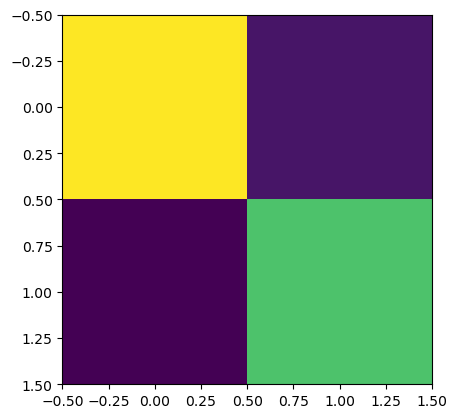

In [110]:
### to make confusion matrix user-friendly
plt.imshow(confusion)

In [111]:
accuracy_score(y_test, y_pred)

0.95